## Exercise
Haberman's Survival

The Objective is perform an exploratory data analysis on Haberman dataset to find out how the independent variables are affecting the depend variable both individualy and collectively with help of various visualizations techniques.

In [1]:
#importing python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#read the data using pandas data frame
data=pd.read_csv('haberman.csv')

In [3]:
#it prints the first 5 rows of data
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
data.shape

(306, 4)

In [13]:
# column names in our dataset
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

## Observation:
* There are total 305 data points
* columns age,year & nodes are independent variables and the column status a dependent variable


Columns Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [7]:
#checking for nulls_values in the dataset
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

There is no null values in given dataset.

In [8]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
# getting  status count of 2 groups

data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

## Observation

Survived: 225 out of 305
Dead with in 5 years: 81 out of 305

Its Imbalanced Data Set.

## BiVariant Analysis

### 2D Scatter Plot

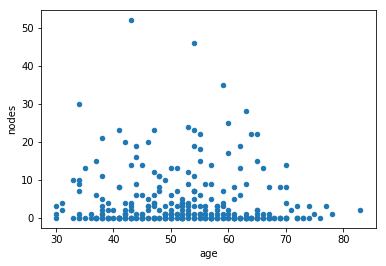

In [10]:
data.plot(y='nodes', x='age',kind='scatter');
plt.show()

#### Observation:

For Most of the Patients The No.of nodes is '0'

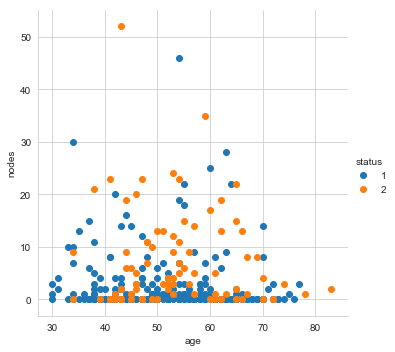

In [11]:
sns.set_style("whitegrid")

sns.FacetGrid(data,hue='status',size=5) \
    .map(plt.scatter,'age', 'nodes') \
    .add_legend()
plt.show()

#### Observation:
We can't classify through this features perfectly with this type of plot.

### PairPlot

Since the number of variables are small, lets start with pair plot to get a high level overiew of the data.

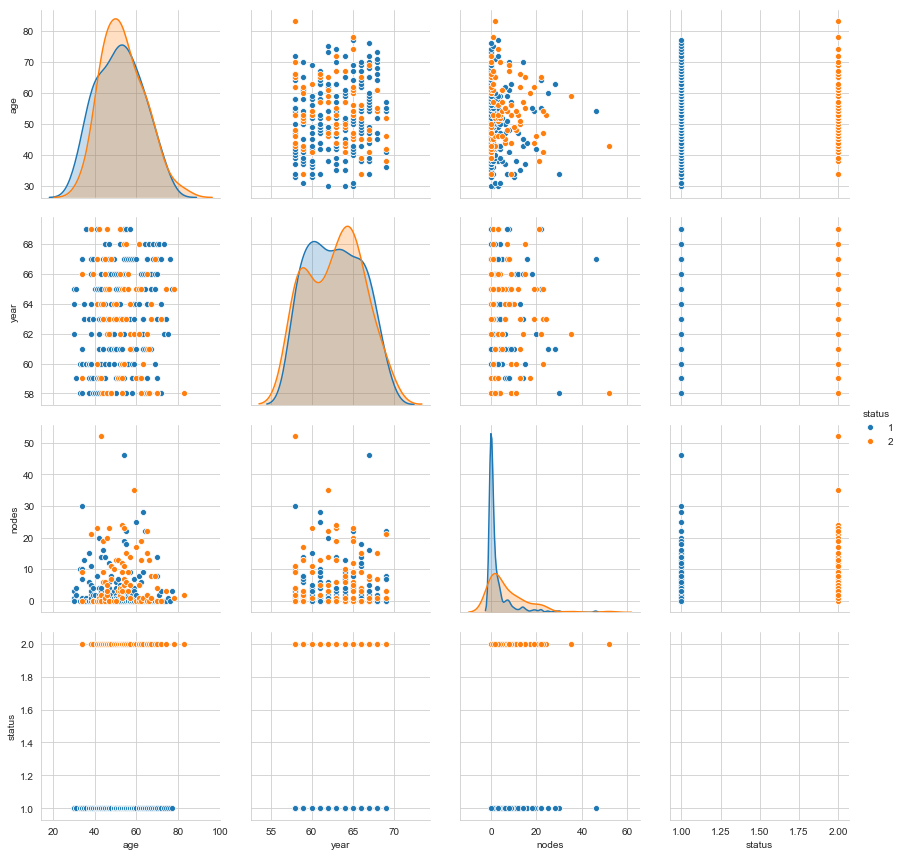

In [14]:
sns.set_style("whitegrid");

sns.pairplot(data,hue='status',size=3)
plt.show()

The pair plot above shows the staus plot as well, which is categorical in nature, therefore trasforming it below.

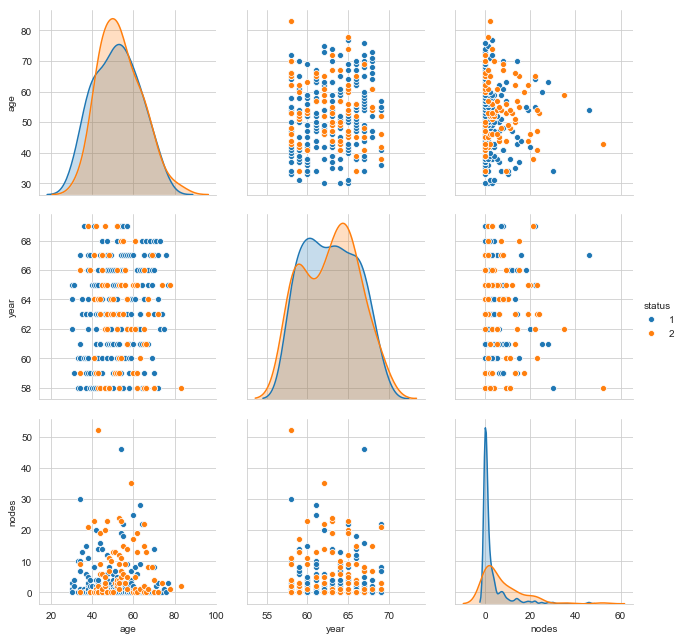

In [15]:
sns.set_style("whitegrid");

sns.pairplot(data,hue='status',size=3,vars=["age", "year","nodes"])
plt.show()

we can observed that the data points are mixed together, therefore it is not possible to classify with regular observation and requires further analysis.
With this 3 plots its difficult to classify the survival status.

### Univariant Analysis

#### PDF

In [18]:
data['status'] = data.status.map({1:'Yes',2:'No'})

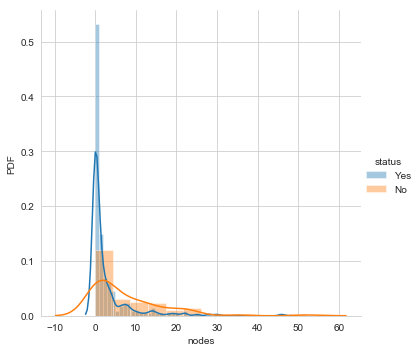

In [19]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('PDF')
plt.show();

Spread is more for survived than dead.

More no.of survived patients has less no.of  Nodes That may indicate a inverse relation between nodes and Survival Status.

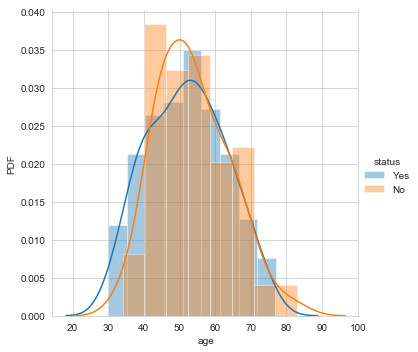

In [21]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('PDF')
plt.show();

The overalp is significant therefore age is not a good variable for classifying the data.

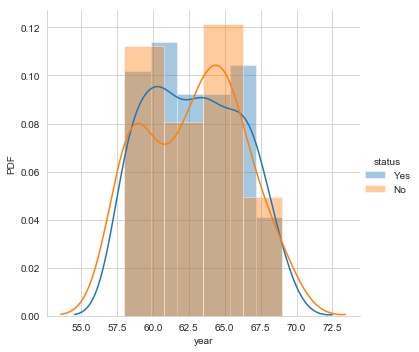

In [22]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('PDF')
plt.show();

Similar to age, the variable year also does not provide any insight.

In [23]:
survived= data[data['status']=='Yes']
survived.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [24]:
dead= data[data['status']=='No']
dead.head()

,age,year,nodes,status
7,34,59,0,No
8,34,66,9,No
24,38,69,21,No
34,39,66,0,No
43,41,60,23,No


In [25]:
survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [26]:
dead.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observation
Survived_patients: Mean of  nodes = 2.8 and std = 5.9.

Dead_patients: Mean of  nodes = 7.45 and std = 9.2.

That Implies More nodes patients may tend to die with in 5 years of operation

### PDF  and CDF

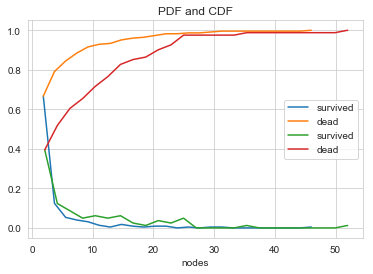

In [30]:
# For Nodes
counts, bin_edges = np.histogram(survived['nodes'], bins=25, 
                                 density = True)
PDF = counts/(sum(counts))
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label='survived');
plt.plot(bin_edges[1:],CDF,label='dead')


counts, bin_edges = np.histogram(dead['nodes'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='survived');
plt.plot(bin_edges[1:], cdf,label='dead')
plt.title('PDF and CDF')
plt.xlabel('nodes')
plt.legend()
plt.show()

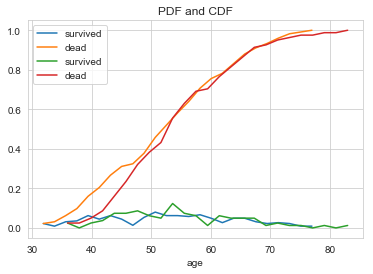

In [31]:
# For age
counts, bin_edges = np.histogram(survived['age'], bins=25, 
                                 density = True)
PDF = counts/(sum(counts))
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label='survived');
plt.plot(bin_edges[1:],CDF,label='dead')


counts, bin_edges = np.histogram(dead['age'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='survived');
plt.plot(bin_edges[1:], cdf,label='dead')
plt.title('PDF and CDF')
plt.xlabel('age')
plt.legend()
plt.show()

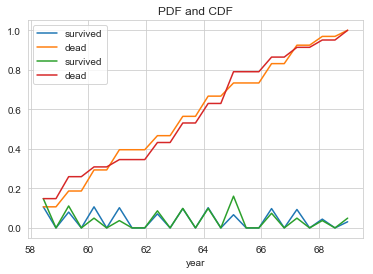

In [32]:
# For year
counts, bin_edges = np.histogram(survived['year'], bins=25, 
                                 density = True)
PDF = counts/(sum(counts))
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label='survived');
plt.plot(bin_edges[1:],CDF,label='dead')


counts, bin_edges = np.histogram(dead['year'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='survived');
plt.plot(bin_edges[1:], cdf,label='dead')
plt.title('PDF and CDF')
plt.xlabel('year')
plt.legend()
plt.show()

### observation
The PDF and CDF also re-iterate the fact that the patient has a high chance of surviving if she has less 1  node and the chances of dead significantly as the number of  nodes increase.

### Box Plot

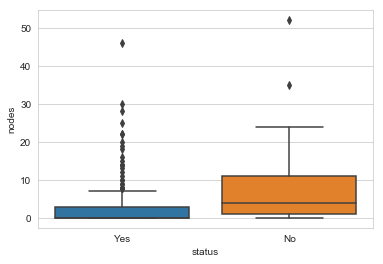

In [34]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

### Observation

* Survived 

About 50 percentile people has nodes 0 and 75 percentile have about 3 axillary nodes.

* death_status 

About 50 percentile people has nodes more than 4 and 25percentile patients have 1-3 nodes.

### Violin Plot

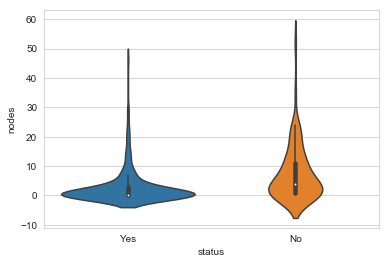

In [35]:
sns.violinplot(x='status',y='nodes', data=data,size=8)
plt.show()

The violin plot simply states the point made above by the boxplot, pdf & cdf. The patient has a high rate of survival if the number of node is equal to 0.

### MultiVariant Analysis

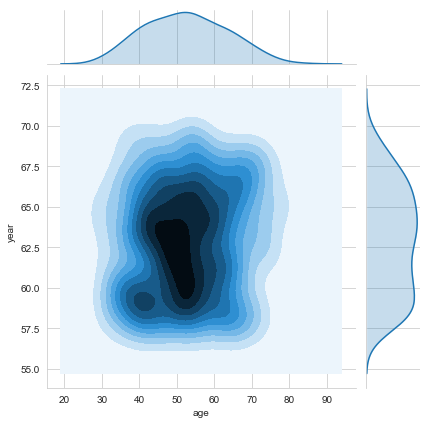

In [36]:
sns.jointplot(x= 'age',kind = 'kde', y='year', data = data)
plt.show()

There are more number of patients undergone operation during the year 1960 - 1964 period and between ages 45 - 55.

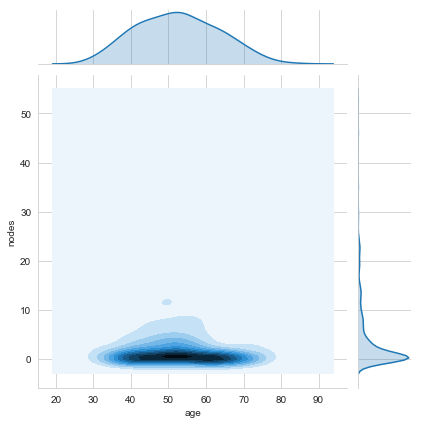

In [37]:
sns.jointplot(x= 'age',kind = 'kde', y='nodes', data = data)
plt.show()

### observation

From PDF,Box plot and Means of no.of  nodes, It is evident that if there are more no.of a nodes the patient may tend to die with in 5 years of operation.

### Conclusion


* Out of all the independent variables node has most impact in determining the status of a patience post operation

* The patient has a high chance of surviving if he has less than 1 node and the chances of survival drop significantly as the number of nodes increase

* The patients who had nodes from 1 to 24 are the majority of patients who died.